# CS295B F18: Homework 4
## $(\epsilon, \delta)$-differential privacy and advanced composition

## Instructions

Before you start, download the example dataset and ensure that all cells in this notebook execute without error. If you have trouble getting the notebook to run, please post a question on Piazza.

To ensure that the notebook runs, I've defined a function `your_code_here()` that simply returns the number `1`. Whenever you see a call to this function, you should replace it with code you have written. Please make sure all cells of your notebook run without error before submitting the assignment. If you have not completed all the questions, leave calls to `your_code_here()` in place or insert dummy values so that the cell does not throw an error when it runs.

To help you arrive at the correct solution, I have left the value computed by my solution in the uploaded version of this notebook. You can refer to these example results by viewing the notebook on Github. If you re-run the cell after downloading the notebook, the results will disappear (because the notebook no longer contains the code that generated them). Your solutions should produce results similar to the ones in the uploaded notebook.

When answering non-code questions, feel free to use a comment, or put the cell in Markdown mode and use Markdown.

Each question in this assignment is worth 10 points. The assignment is due by 11:59pm on Wednesday, October 10. When you have finished your assignment, submit it via Blackboard under the assignment "Homework 4." For questions on grading and submitting assignments, refer to the course webpage or email the instructor.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

# Some useful utilities

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def gaussian_mech(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

def z_clip(xs, b):
    return [min(x, b) for x in xs]

def your_code_here():
    return 1

In [2]:
adult_data = pd.read_csv("adult_with_pii.csv", parse_dates=['DOB'])

## End preamble =======================

## Collaboration Statement

In the cell below, write your collaboration statement. This statement should describe all collaborations, even high-level ones (e.g. "I discussed my general approach for answering question 3 with Josh"). High-level collaborations of this kind are allowed as long as they are described; copying of answers or code is not allowed.

In [3]:
# Write your collaboration statement here

## Question 1

Consider the code below, which mounts an averaging attack on the privacy budget $\epsilon$. Graph the total privacy cost of the averaging attack under (1) sequential composition and (2) advanced composition, for values of `k` between 1 and 200.

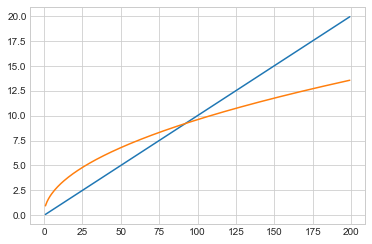

In [4]:
epsilon = .1
delta_p = 1e-5

def query():
    return len(adult_data[adult_data['Martial Status'] == 'Divorced'])

def avg_attack(k):
    return np.mean([laplace_mech(query(), 1, epsilon) for i in range(k)])
    
xs = range(1, 200)
privacy_cost_sequential = [your_code_here() for x in xs]
privacy_cost_advanced = [your_code_here() for x in xs]

plt.plot(xs, privacy_cost_sequential);
plt.plot(xs, privacy_cost_advanced);

## Question 2

In 2-5 sentences, answer the following:
- At approximately what point do the lines representing the two approaches cross? What does this mean about **which** composition technique should be used for an iterative algorithm?
- The two lines represent **different** privacy costs for the **same** algorithm. How can both be correct?

## Question 3

In the cell below, define a function that implements the vector version of the Laplace mechanism. An implementation that works for a single number is defined for reference as `laplace_mech` above.

In [5]:
def laplace_mech_vec(qs, sensitivity, epsilon):
    return your_code_here()

## Question 4

In the cell below, define a function that implements the vector version of the Gaussian mechanism. An implementation that works for a single number is defined for reference as `gaussian_mech` above.

In [6]:
def gaussian_mech_vec(qs, sensitivity, epsilon, delta):
    return your_code_here()

## Question 5

Consider the code below, which defines three average queries and runs them on `adult_data`, using the Laplace mechanism to provide differential privacy with $\epsilon = 1$ for each query.

In [7]:
b_capgain = 3000
b_year = 3000
b_age = 3000

epsilon = 1
n = len(adult_data)

def query1():
    return np.sum(z_clip(adult_data['Capital Gain'], b_capgain))/n

def query2():
    return np.sum(z_clip(adult_data['DOB'].dt.year, b_year))/n

def query3():
    return np.sum(z_clip(adult_data['Age'], b_age))/n

def my_query():
    return [query1(), query2(), query3()]

my_query()

[235.98968090660605, 1981.2278185559412, 38.58164675532078]

In 2-5 sentences, answer the following:
- What is the $L_1$ sensitivity of `my_query`, and why?
- What is the $L_2$ sensitivity of `my_query`, and why?

## Question 6

In the cell below, write code to release the results of calling `my_query()` with differential privacy, without using sequential composition.

*Hint*: use `laplace_mech_vec`, but be careful of sensitivity!

In [8]:
your_code_here()

0.27640428733761246

[235.52194636854944, 1981.044367211257, 38.043169679787646]

## Question 7

In 2-5 sentences, answer the following:
- What is the total privacy cost of your answer to Question 6, and why? *Hint*: there should be *only* one call to the Laplace mechanism, and so sequential composition is not needed!

## Question 8

In the cell below, write code to release the results of `my_query()` with differential privacy, but using the Gaussian mechanism.

*Hint*: remember to use $L_2$ sensitivity

In [9]:
your_code_here()

0.15958208969953724

[234.93996645104335, 1980.9810984180806, 39.572915355485584]

## Question 9

In the cell below, implement a new version of `pct_error` that works for lists of results by summing the error introduced to each list element. Then use your definition of `pct_error_vec` to plot the error behavior of your solutions to Questions 6 and 8 (i.e. compare the Laplace and Gaussian mechanisms on the same query) on 100 runs of each.

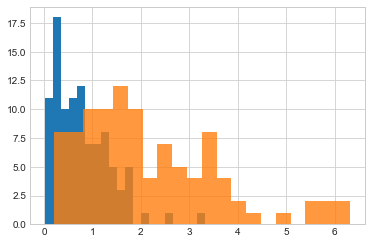

In [10]:
def pct_error_vec(orig, priv):
    return your_code_here()

errors_gaussian = [pct_error_vec(my_query(), your_code_here()) for n in range(100)]
errors_laplace = [pct_error_vec(my_query(), your_code_here()) for n in range(100)]

plt.hist(errors_laplace, bins=20);
plt.hist(errors_gaussian, bins=20, alpha = .8);

## Question 10

In 2-8 sentences, answer the following:
- Based on the results in Question 9, which mechanism (Laplace or Gaussian) provides more accurate answers in this case?
- *In general*, which mechanism would you expect to return more accurate results for vector-valued queries? *Hint*: consider that the Laplace mechanism uses $L_1$ sensitivity, while the Gaussian mechanism uses $L_2$ sensitivity
- Do the results in Question 9 match up with the answer you gave to the previous point?
- If not, what do you think is the reason for the mismatch?